# Characterization of Systems in the Time Domain

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Communications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Convolution

As shown in the previous Section, the convolution is an important operation in the theory of signals and systems. It also shows up in a wide range of other physical and mathematical problems. The [convolution operation](https://en.wikipedia.org/wiki/Convolution) is therefore of general interest and well known. The properties of the convolution are reviewed, followed by a widely used graphical interpretation of the operation.

The convolution of two signals $x(t)$ and $h(t)$ is defined as

\begin{equation}
(x * h)(t) = x(t) * h(t) = \int_{-\infty}^{\infty} x(\tau) \cdot h(t - \tau) \; d\tau = 
\int_{-\infty}^{\infty} x(t - \tau) \cdot h(\tau) \; d\tau
\end{equation}

where $*$ is a common short-hand notation of the convolution.

### Properties

For the signals $x(t)$, $h(t)$, $g(t) \in \mathbb{C}$ the convolution shows the following properties 

1. The Dirac impulse is the [identity element](https://en.wikipedia.org/wiki/Identity_element) of the convolution
    \begin{equation}
    x(t) * \delta(t) = x(t)
    \end{equation}

2. The convolution is [commutative](https://en.wikipedia.org/wiki/Commutative_property)
    \begin{equation}
    x(t) * h(t) = h(t) * x(t)
    \end{equation}

3. The convolution is [associative](https://en.wikipedia.org/wiki/Associative_property)
    \begin{equation}
    \left[ x(t) * h(t) \right] * g(t) = x(t) * \left[ h(t) * g(t) \right] 
    \end{equation}

5. The convolution is [distributive](https://en.wikipedia.org/wiki/Distributive_property)
    \begin{equation}
    x(t) * \left[ h(t) + g(t) \right] = x(t) * h(t) + x(t) * g(t)
    \end{equation}

5. Multiplication with a scalar $a \in \mathbb{C}$
    \begin{equation}
    a \cdot \left[ x(t) * h(t) \right] = \left[ a \cdot x(t) \right] * h(t) = x(t) * \left[ a \cdot h(t) \right]
    \end{equation}

6. Derivative of the convolution
    \begin{equation}
    \frac{d}{dt} \left[ x(t) * h(t) \right] =  \frac{d x(t)}{dt} * h(t) = x(t) * \frac{d h(t)}{dt}
    \end{equation}

The first property is a consequence of the sifting property of the Dirac pulse, the second to fifth property can be proven by considering the convolution integral and the sixth property follows from the properties of the derivative of the Dirac delta function.

### Graphical Interpretation

The convolution is commonly [interpreted in a graphical manner](https://en.wikipedia.org/wiki/Convolution#Visual_explanation). This interpretation provides valuable insights into its calculation and allows to derive a first estimate of the result. The calculation of the convolution integral

\begin{equation}
y(t) = \int_{-\infty}^{\infty} x(\tau) \cdot h(t-\tau) \; d\tau
\end{equation}


can be decomposed into four subsequent operations:

* 1. substitute $t$ by $\tau$ in both $x(t)$ and $h(t)$,

* 2. time-reverse $h(\tau)$ (mirroring at vertical axis),

* 3. shift $h(-\tau)$ by $t$ to the right to yield $h(t - \tau)$,

* 4. shift $h(t - \tau)$ throughout $t = -\infty \dots \infty$, check if it overlaps with $x(\tau)$ and calculate the convolution integral for the overlapping sections.

The graphical interpretation of these operations is illustrated in the remainder by an example. 

**Example**

The convolution $y(t) = x(t) * h(t)$ is graphically illustrated using the particular signals

\begin{align}
h(t) &= e^{-t} \\
x(t) &= \text{rect} \left(t - \frac{1}{2}\right)
\end{align}

Before proceeding, helper functions for the rectangular signal and plotting of the signals are defined

In [1]:
import sympy as sym
%matplotlib inline
sym.init_printing()

t, tau = sym.symbols('t tau', real=True)

In [2]:
class rect(sym.Function):

    @classmethod
    def eval(cls, arg):
        return sym.Heaviside(arg + sym.S.Half) - sym.Heaviside(arg - sym.S.Half)

In [3]:
def plot_signals(x_axis, x, h, ylabel, xlabel):
    p1 = sym.plot(x, (x_axis, -5, 5), show=False,
                  line_color='b', ylabel=ylabel, xlabel=xlabel)
    p2 = sym.plot(h, (x_axis, -5, 5), show=False, line_color='r')
    p1.extend(p2)
    p1.show()

Now lets define and plot the signals. In the following, the impulse response $h(t)$ is illustrated by the red graph and the input signal $x(t)$ by the blue graph.

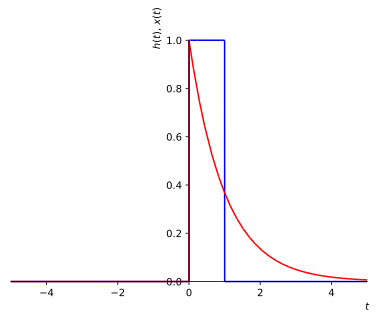

In [4]:
h = sym.exp(-t) * sym.Heaviside(t)
x = rect(t - 1/2)

plot_signals(t, x, h, r'$h(t)$, $x(t)$', r'$t$')

The **first step** is to substitute $t$ by $\tau$ to yield $h(\tau)$ and $x(\tau)$. Note, the horizontal axis of the plot represents now $\tau$

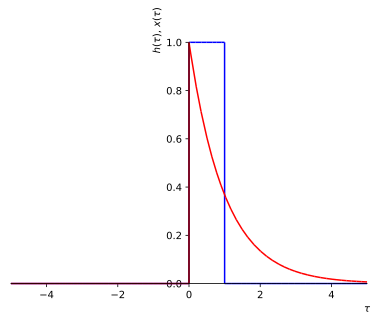

In [5]:
h1 = h.subs(t, tau)
x1 = x.subs(t, tau)

plot_signals(tau, x1, h1, r'$h(\tau)$, $x(\tau)$', r'$\tau$')

The **second step** is to time-reverse $h(\tau)$ to yield $h(-\tau)$

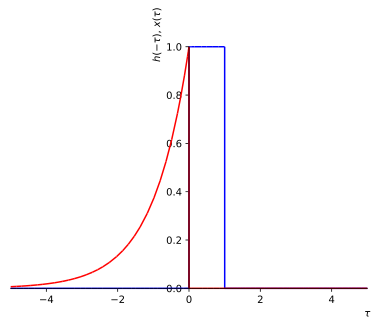

In [6]:
h2 = h.subs(t, -tau)

plot_signals(tau, x1, h2, r'$h(-\tau)$, $x(\tau)$', r'$\tau$')

In the **third setp** the impulse response $h(-\tau)$ is shifted by $t$ (to the **right** for $t>0$, to the **left** for $t<0$) to yield $h(t - \tau)$.

In [7]:
h3 = h.subs(t, t-tau)

For the **fourth step** it is often useful to split the calculation of the result according to the overlap between $h(t-\tau)$ and $x(\tau)$. For the given particular signals three different cases may be considered

1. no overlap for $t<0$,
2. partial overlap for $0 \leq t < 1$, and
3. full overlap for $t > 0$.

The first case, no overlap, is illustrated for $t = -2$

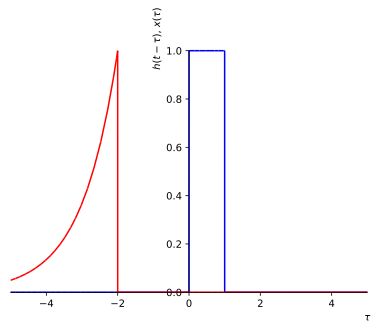

In [8]:
plot_signals(tau, x1, h3.subs(t, -2), r'$h(t-\tau)$, $x(\tau)$', r'$\tau$')

Form this it becomes clear that the result for the first case is given as

\begin{equation}
y(t) = 0 \qquad \text{for } t < 0
\end{equation}

The second case, partial overlap, is illustrated for $t = \frac{1}{2}$

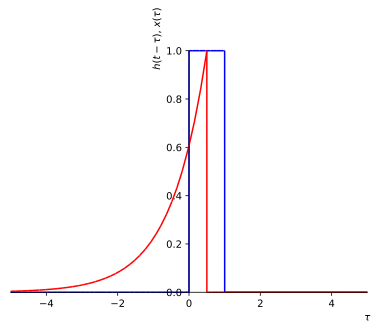

In [9]:
plot_signals(tau, x1, h3.subs(t, .5), r'$h(t-\tau)$, $x(\tau)$', r'$\tau$')

Hence, for the second case the convolution integral degenerates to

\begin{equation}
y(t) = \int_{0}^{t} e^{-(t - \tau)} d\tau = 1 - e^{-t} \qquad \text{for } 0 < t < 1
\end{equation}

The third case, full overlap, is illustrated for $t = 3$

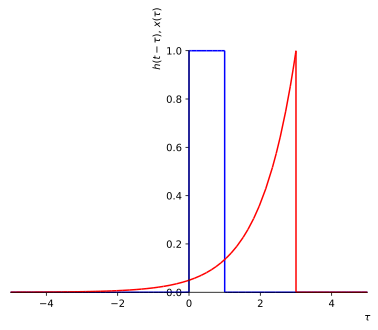

In [10]:
plot_signals(tau, x1, h3.subs(t, 3), r'$h(t-\tau)$, $x(\tau)$', r'$\tau$')

For the third case the convolution integral degenerates to

\begin{equation}
y(t) = \int_{0}^{1} e^{-(t - \tau)} d\tau = (e - 1) e^{-t} \qquad \text{for } t > 1
\end{equation}

The overall result is composed from the three individual results. 

As alternative and in order to plot the result, the convolution integral is evaluated in `SymPy`

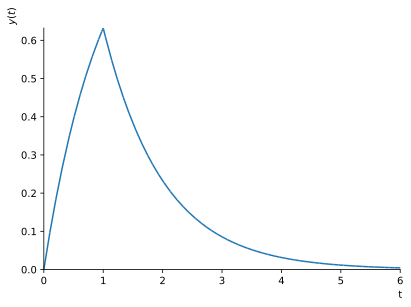

In [11]:
y = sym.integrate(h.subs(t,t-tau) * x.subs(t, tau), (tau, 0, t))
sym.plot(y, (t,0,6), ylabel=r'$y(t)$');

### Alternative Graphical Representation

The **order** of mirroring and time shifting of $h(\tau)$ can be **exchanged**. The algorithm is then performed with the following four steps:

* 1. Substitute $t$ by $\tau$ in both $x(t)$ and $h(t)$, yielding $x(\tau)$ and $h(\tau)$ over $\tau$, i.e. signals are the same only defined over time variable $\tau$.

* 2. Shift $h(\tau)$ by $t$ to yield $h(\tau-t)$, **delayed** for $t>0$, **leading** for $t<0$ as discussed in the continuous signal operations notebook.

* 3. Create $h(-(\tau-t)) = h(t-\tau)$, which is mirroring the signal along vertical axis at the value $t$.

* 4. Calculate the convolution integral for all overlapping sections of $x(\tau)$ and $h(t-\tau)$. This yields the specific convolution result at specified $t$.

Perform 1st to 4th step for all $t$ - at least for all $t$ where overlapping occurs in the 4th step - to obtain the full convolution result.

The graphical interpretation of these operations is illustrated in the remainder by the same example as above.

In the following, the impulse response $h(t)$ is illustrated by the red graph and the input signal $x(t)$ by the blue graph.

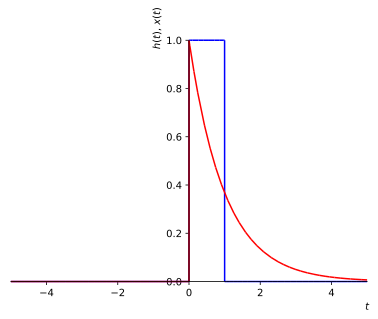

In [27]:
h = sym.exp(-t) * sym.Heaviside(t)
x = rect(t-1/2)

plot_signals(t, x, h, r'$h(t)$, $x(t)$', r'$t$')

The **first step** (identical to the approach above) is to substitute $t$ by $\tau$ to yield $h(\tau)$ and $x(\tau)$. Note, the horizontal axis of the plot represents now $\tau$.

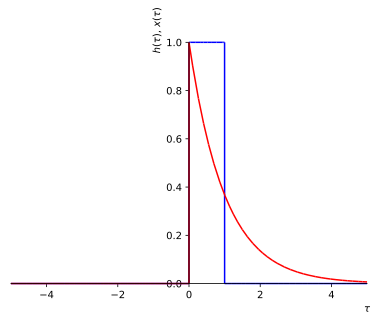

In [28]:
h1 = h.subs(t, tau)
x1 = x.subs(t, tau)

plot_signals(tau, x1, h1, r'$h(\tau)$, $x(\tau)$', r'$\tau$')

The **second step** is to shift $h(\tau)$ to yield $h(\tau-t)$, for the example $t=-2$ is chosen, thus $h(\tau-t)$ is now **leading** compared to $h(\tau)$.

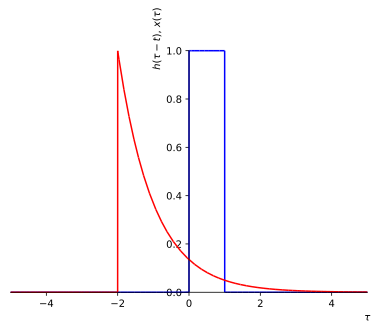

In [29]:
h2 = h1.subs(tau, tau-t)

plot_signals(tau, x1, h2.subs(t,-2), r'$h(\tau-t)$, $x(\tau)$', r'$\tau$')

In the **third** step we create $h(-(\tau-t)) = h(t-\tau)$, which is mirroring the signal $h(\tau-t)$ along vertical axis at the value $t$.

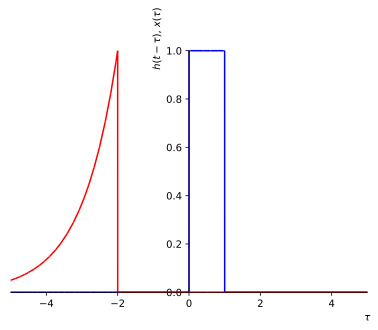

In [30]:
h3 = h1.subs(tau, -(tau-t))

plot_signals(tau, x1, h3.subs(t,-2), r'$h(t-\tau)$, $x(\tau)$', r'$\tau$')

In the **fourth step** the convolution integral is evaluated. In the example for $t=1$ the largest overlap area yields the convolution result $y(t=1) = 1-\mathrm{e}^{-1} \approx 0.63$, which is the maximum of $y(t)$.

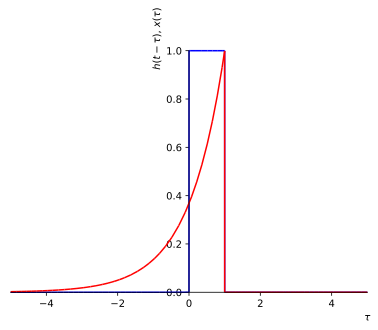

In [26]:
# full overlap with largest area at t=1
plot_signals(tau, x1, h3.subs(t,1), r'$h(t-\tau)$, $x(\tau)$', r'$\tau$')

Repeat steps one to four for all $t$ to obtain $y(t)$, $y(t)$ is zero for all $t$ where no overlap occurs.
You might realize that only the 4th step must be repeatedly evaluated inserting a specific $t$. 

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Lecture Notes on Signals and Systems* by Sascha Spors.